In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def hantush_well_function(u, r_over_B):
    """
    Compute the Hantush well function W(u, r/B) via numerical integration.
    """
    def integrand(y, u_val, rB_val):
        return (np.exp(-y) / y) * np.exp(-rB_val * np.sqrt(u_val / y))

    # Vectorized integration
    def compute_single(u_val, rB_val):
        result, _ = quad(integrand, u_val, np.inf, args=(u_val, rB_val))
        return result

    vectorized_func = np.vectorize(compute_single)
    return vectorized_func(u, r_over_B)

def hantush_jacob_drawdown(Q, T, S, r, t, B):
    """
    Generalized Hantush–Jacob drawdown for vectors of r and/or t.

    Parameters:
    Q : float
        Pumping rate [L³/T]
    T : float
        Transmissivity [L²/T]
    S : float
        Storage coefficient [-]
    r : float or np.ndarray
        Radial distance(s) [L]
    t : float or np.ndarray
        Time(s) [T]
    B : float
        Leakage factor [L]

    Returns:
    s : np.ndarray
        Drawdown matrix with shape (len(t), len(r)) if both are arrays
    """
    r = np.atleast_1d(r)
    t = np.atleast_1d(t)

    R, Tm = np.meshgrid(r, t)  # Broadcast r and t into 2D grids
    U = (R**2 * S) / (4 * T * Tm)
    R_over_B = R / B

    W = hantush_well_function(U, R_over_B)
    s = (Q / (4 * np.pi * T)) * W

    return s if s.shape != (1, 1) else s.item()  # return scalar if input was scalar


# Spatial pattern, fixed time

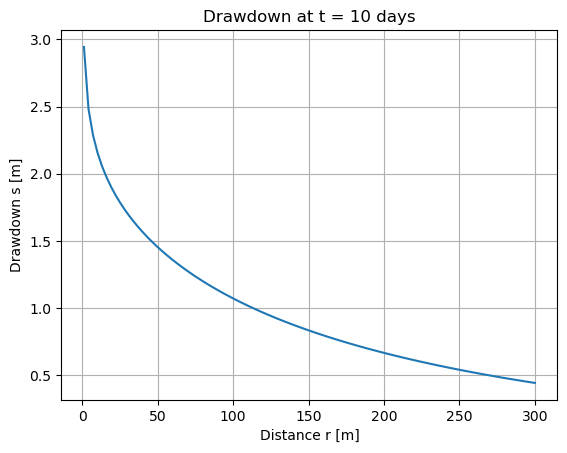

In [7]:
r_vals = np.linspace(1, 300, 100)
t_val = 10  # fixed time
s_r = hantush_jacob_drawdown(Q=1000, T=500, S=1e-4, r=r_vals, t=t_val, B=50)

plt.plot(r_vals, s_r.flatten())
plt.xlabel('Distance r [m]')
plt.ylabel('Drawdown s [m]')
plt.title(f'Drawdown at t = {t_val} days')
plt.grid(True)
plt.show()


# Temporal evolution at fixed position

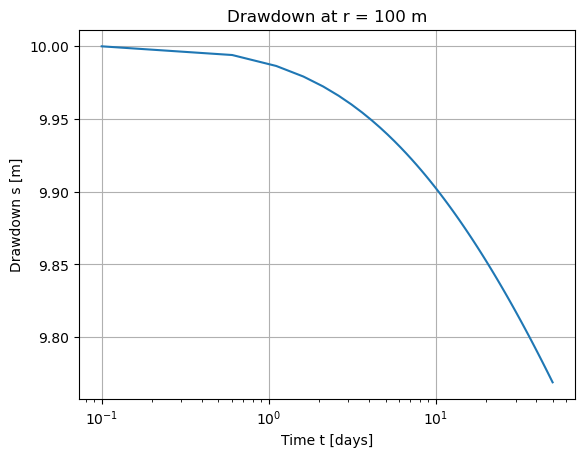

In [16]:
t_vals = np.linspace(0.1, 50, 100)
r_val = 100  # fixed distance
s_t = hantush_jacob_drawdown(Q=1000, T=500, S=1e-4, r=r_val, t=t_vals, B=1)
h0 = 10

plt.plot(t_vals,h0-s_t.flatten())
plt.xlabel('Time t [days]')
plt.ylabel('Drawdown s [m]')
plt.title(f'Drawdown at r = {r_val} m')
plt.xscale('log')
plt.grid(True)
plt.show()
